<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

## **Import**

In [416]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## **Load the dataset**

In [417]:
df = pd.read_csv("movie_dataset.csv")

## **Understanding the Data**

In [418]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [420]:
df.nunique()

,0
index,4803
budget,436
genres,1168
homepage,1691
id,4803
keywords,4219
original_language,37
original_title,4801
overview,4800
popularity,4802


In [421]:
df['status'].value_counts()

,count
status,
Released,4795
Rumored,5
Post Production,3


In [422]:
columns_to_drop = ['index', 'id', 'keywords', 'original_title', 'overview', 'spoken_languages', 'status', 'tagline', 'title', 'crew']
df.drop(columns=columns_to_drop, inplace=True)

In [423]:
df.isnull().sum()

,0
budget,0
genres,28
homepage,3091
original_language,0
popularity,0
production_companies,0
production_countries,0
release_date,1
revenue,0
runtime,2


## **Data Cleaning**

In [424]:
df['homepage'] = df['homepage'].notna().astype(int)
df['genres'] = df['genres'].str.split(' ')
df['production_companies'] = df['production_companies'].apply(
    lambda x: ', '.join([d['name'] for d in ast.literal_eval(x)])
)
df['production_countries'] = df['production_countries'].apply(
        lambda x: ', '.join([d['name'] for d in ast.literal_eval(x)])
)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

def combine_first_last_names(name_string):
    if pd.isna(name_string) or not isinstance(name_string, str):
        return []
    words = name_string.split(' ')
    full_names = []
    i = 0
    while i < len(words):
        # Try to combine two words for a name
        if i + 1 < len(words):
            full_names.append(f"{words[i]} {words[i+1]}")
            i += 2
        else:
            # If only one word remains, treat it as a single-word name
            full_names.append(words[i])
            i += 1
    return full_names

df['cast'] = df['cast'].apply(combine_first_last_names)
df['director'] = df['director'].apply(combine_first_last_names)

In [425]:
df.head()

,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, Science, Fiction]",1,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",1,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007.0,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",1,en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015.0,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, L\u00e9a Seydo...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",1,en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012.0,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science, Fiction]",1,en,43.926995,Walt Disney Pictures,United States of America,2012.0,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


### **Number of Genres**

In [426]:
unique_count = df['genres'].explode().nunique()
print("Number of unique genres:", unique_count)

Number of unique genres: 22


In [427]:
unique_genres = df['genres'].explode().unique()
print(unique_genres)

['Action' 'Adventure' 'Fantasy' 'Science' 'Fiction' 'Crime' 'Drama'
 'Thriller' 'Animation' 'Family' 'Western' 'Comedy' 'Romance' 'Horror'
 'Mystery' 'History' 'War' 'Music' 'Documentary' 'Foreign' 'TV' 'Movie'
 nan]


In [428]:
genre_counts = df['genres'].explode().value_counts()
print(genre_counts)

genres
Drama          2297
Comedy         1722
Thriller       1259
Action         1153
Romance         890
Adventure       790
Crime           696
Science         530
Fiction         530
Horror          519
Family          510
Fantasy         418
Mystery         347
Animation       234
History         197
Music           183
War             142
Documentary     110
Western          80
Foreign          34
TV                8
Movie             8
Name: count, dtype: int64


In [429]:
low_count_genres = genre_counts[genre_counts < 100].index.tolist()

df['genres'] = df['genres'].apply(
    lambda x: [genre for genre in x if genre not in low_count_genres] if isinstance(x, list) else []
)

print(f"Genres with counts less than 100 removed from 'genres' column: {low_count_genres}")

Genres with counts less than 100 removed from 'genres' column: ['Western', 'Foreign', 'TV', 'Movie']


In [430]:
df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

genres_dummies = pd.get_dummies(df['genres'].explode(), prefix='genres').groupby(level=0).max().astype(int)

df = df.join(genres_dummies)

df = df.drop(columns=['genres'])

In [431]:
df.head()

,budget,homepage,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,...,genres_Fantasy,genres_Fiction,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science,genres_Thriller,genres_War
0,237000000,1,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,...,1,1,0,0,0,0,0,1,0,0
1,300000000,1,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007.0,961000000,169.0,6.9,...,1,0,0,0,0,0,0,0,0,0
2,245000000,1,en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015.0,880674609,148.0,6.3,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012.0,1084939099,165.0,7.6,...,0,0,0,0,0,0,0,0,1,0
4,260000000,1,en,43.926995,Walt Disney Pictures,United States of America,2012.0,284139100,132.0,6.1,...,0,1,0,0,0,0,0,1,0,0


/tmp/ipython-input-3972253365.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_genres.index, y=all_genres.values, palette='viridis')


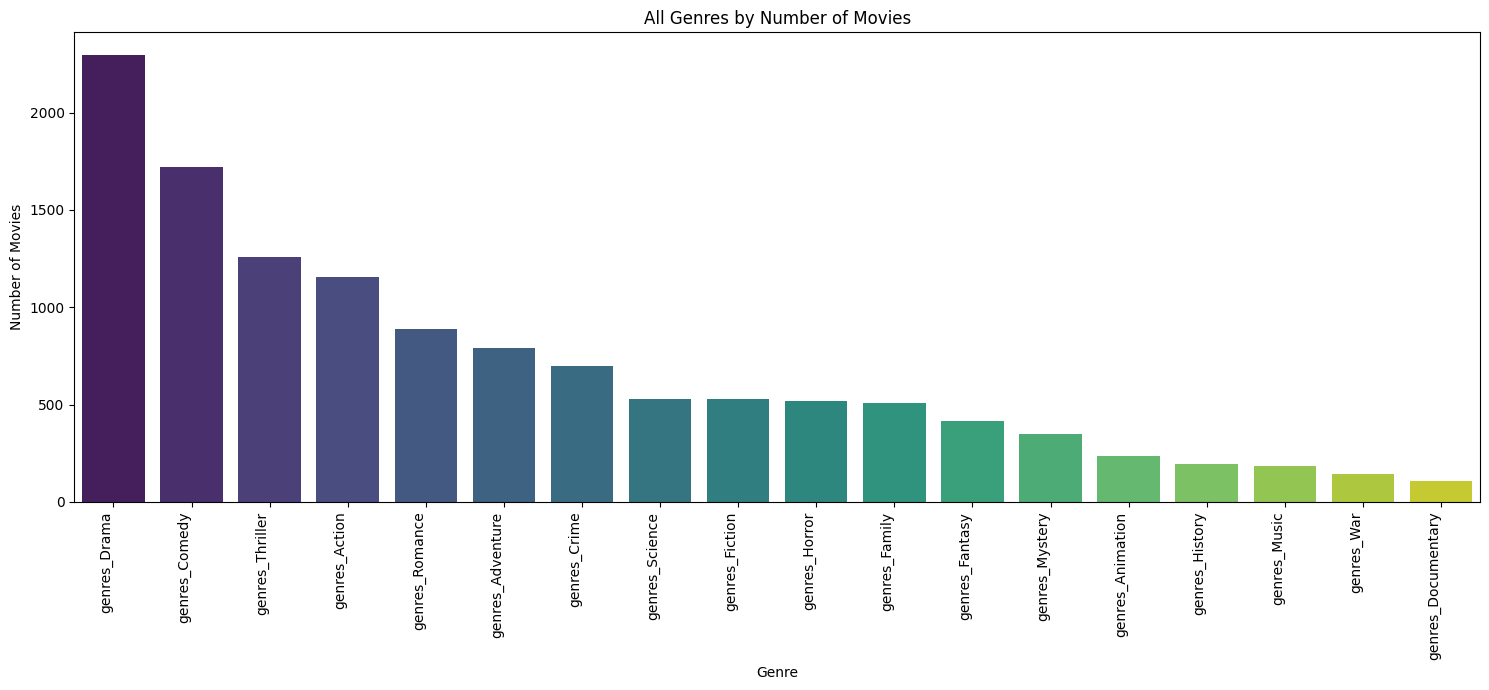

In [432]:
genre_columns = [col for col in df.columns if col.startswith('genres_')]

genre_columns = [col for col in genre_columns if col != 'genres__']

if not genre_columns:
    print("No columns starting with 'genres_' found.")
else:
    genres_counts = df[genre_columns].sum().sort_values(ascending=False)

    all_genres = genres_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_genres.index, y=all_genres.values, palette='viridis')
    plt.title('All Genres by Number of Movies')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Language**

In [433]:
unique_count = df['original_language'].nunique()
print("Number of unique language:", unique_count)

Number of unique language: 37


In [434]:
unique_values = df['original_language'].unique()
print(unique_values)


['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [435]:
value_counts = df['original_language'].value_counts()
print(value_counts)

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64


In [436]:
lang_counts = df['original_language'].value_counts()

low_count_langs = lang_counts[lang_counts < 20].index.tolist()

df['original_language'] = df['original_language'].apply(
    lambda x: x if x not in low_count_langs else None
)

print(f"Languages with counts less than 20 removed from 'original_language' column: {low_count_langs}")

Languages with counts less than 20 removed from 'original_language' column: ['hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt', 'da', 'sv', 'nl', 'fa', 'th', 'he', 'id', 'cs', 'ta', 'ro', 'ar', 'te', 'hu', 'xx', 'af', 'is', 'tr', 'vi', 'pl', 'nb', 'ky', 'no', 'sl', 'ps', 'el']


In [437]:
df = pd.get_dummies(df, columns=['original_language'], prefix='lang', dtype=int)

In [438]:
df.head()

,budget,homepage,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,...,genres_Mystery,genres_Romance,genres_Science,genres_Thriller,genres_War,lang_de,lang_en,lang_es,lang_fr,lang_zh
0,237000000,1,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,11800,...,0,0,1,0,0,0,1,0,0,0
1,300000000,1,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007.0,961000000,169.0,6.9,4500,...,0,0,0,0,0,0,1,0,0,0
2,245000000,1,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015.0,880674609,148.0,6.3,4466,...,0,0,0,0,0,0,1,0,0,0
3,250000000,1,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012.0,1084939099,165.0,7.6,9106,...,0,0,0,1,0,0,1,0,0,0
4,260000000,1,43.926995,Walt Disney Pictures,United States of America,2012.0,284139100,132.0,6.1,2124,...,0,0,1,0,0,0,1,0,0,0


/tmp/ipython-input-1551459671.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_languages.index, y=all_languages.values, palette='viridis')


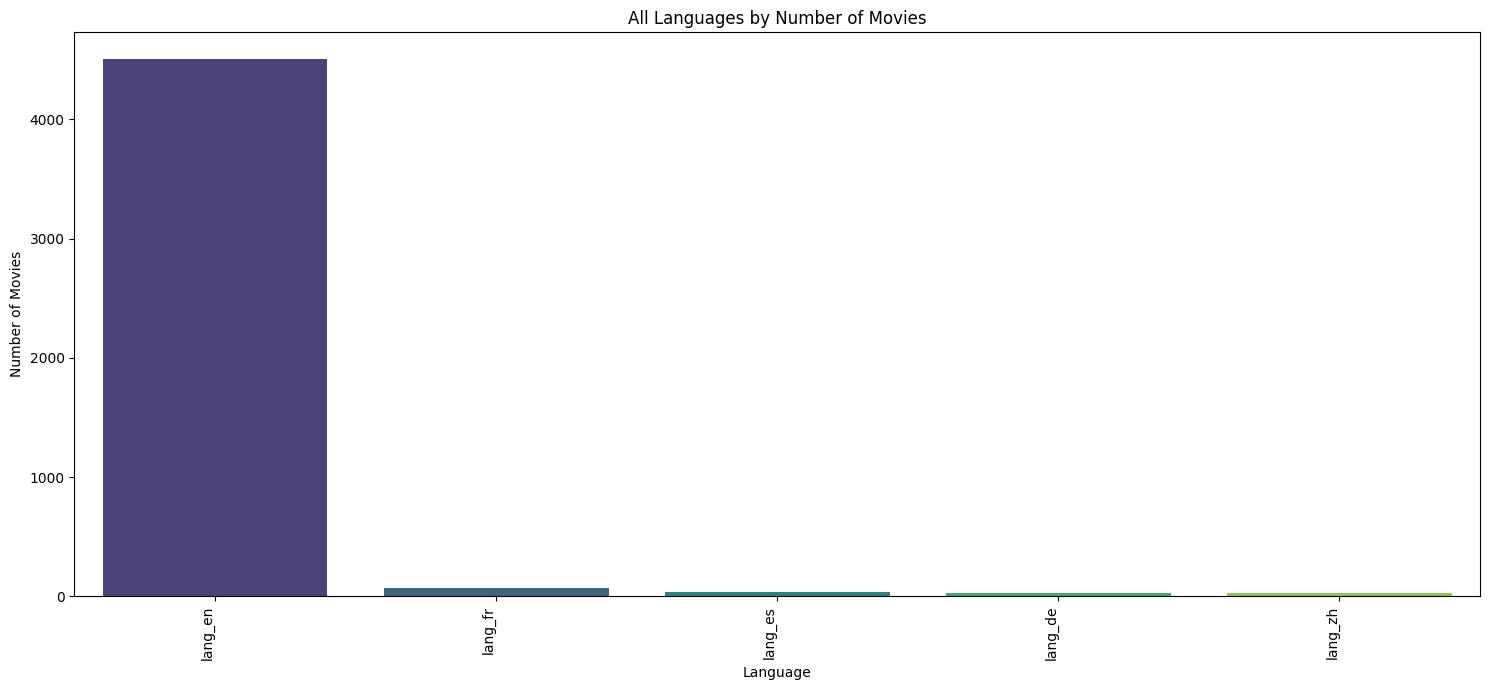

In [439]:
lang_columns = [col for col in df.columns if col.startswith('lang_')]

lang_columns = [col for col in lang_columns if col != 'lang__']

if not lang_columns:
    print("No columns starting with 'lang_' found.")
else:
    lang_counts = df[lang_columns].sum().sort_values(ascending=False)

    all_languages = lang_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_languages.index, y=all_languages.values, palette='viridis')
    plt.title('All Languages by Number of Movies')
    plt.xlabel('Language')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Production Company**

In [440]:
unique_count = df['production_companies'].str.split(', ').explode().nunique()
print("Number of unique company:", unique_count)

Number of unique company: 5026


In [441]:
unique_values = df['production_companies'].str.split(', ').explode().unique()
print(unique_values)

['Ingenious Film Partners' 'Twentieth Century Fox Film Corporation'
 'Dune Entertainment' ... 'Front Street Pictures'
 'rusty bear entertainment' 'lucky crow films']


In [442]:
value_counts = df['production_companies'].str.split(', ').explode().value_counts()
print(value_counts)

production_companies
                                          351
Warner Bros.                              319
Universal Pictures                        311
Paramount Pictures                        285
Twentieth Century Fox Film Corporation    222
                                         ... 
Pitchblack Pictures Inc.                    1
Event Film Distribution                     1
Amok Productions                            1
lucky crow films                            1
Grindfest                                   1
Name: count, Length: 5026, dtype: int64


In [443]:
company_counts = df['production_companies'].str.split(', ').explode().value_counts()

low_count_companies = company_counts[company_counts < 50].index.tolist()

df['production_companies'] = df['production_companies'].apply(
    lambda x: ', '.join([company for company in x.split(', ') if company not in low_count_companies])
    if isinstance(x, str) else ''
)

print(f"Production companies with counts less than 50 removed from 'production_companies' column: {low_count_companies}")

Production companies with counts less than 50 removed from 'production_companies' column: ['Amblin Entertainment', 'The Weinstein Company', 'Screen Gems', 'StudioCanal', 'New Regency Pictures', 'Castle Rock Entertainment', 'Spyglass Entertainment', 'BBC Films', 'Scott Rudin Productions', 'UK Film Council', 'Focus Features', 'Imagine Entertainment', 'Film4', 'Lakeshore Entertainment', 'Davis Entertainment', 'Legendary Pictures', 'Lions Gate Films', 'Revolution Studios', 'Silver Pictures', 'Epsilon Motion Pictures', 'Happy Madison Productions', 'DreamWorks Animation', 'Original Film', 'Ingenious Film Partners', 'Hollywood Pictures', 'Millennium Films', 'Scott Free Productions', 'TSG Entertainment', 'Studio Babelsberg', 'Dune Entertainment III', 'NPV Entertainment', 'Participant Media', 'EuropaCorp', 'MTV Films', 'Morgan Creek Productions', 'Intermedia Films', 'Eon Productions', 'Nickelodeon Movies', 'Alcon Entertainment', 'Blumhouse Productions', 'Jerry Bruckheimer Films', 'Constantin Fi

In [444]:
df['production_companies'] = df['production_companies'].apply(lambda x: [company.strip() for company in x.split(', ')] if isinstance(x, str) else [])

df = df.join(
    pd.get_dummies(df['production_companies']
    .explode(), prefix='company_')
    .groupby(level=0)
    .max()
    .astype(int)
)

df = df.drop(columns=['production_companies'])

In [445]:
df.head()

,budget,homepage,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,...,company__The,company__Touchstone Pictures,company__TriStar Pictures,company__Twentieth Century Fox Film Corporation,company__United Artists,company__Universal Pictures,company__Village Roadshow Pictures,company__Walt Disney Pictures,company__Warner Bros.,company__Working Title Films
0,237000000,1,150.437577,"United States of America, United Kingdom",2009.0,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",...,0,0,0,1,0,0,0,0,0,0
1,300000000,1,139.082615,United States of America,2007.0,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",...,0,0,0,0,0,0,0,1,0,0
2,245000000,1,107.376788,"United Kingdom, United States of America",2015.0,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, L\u00e9a Seydo...",...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,United States of America,2012.0,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",...,0,0,0,0,0,0,0,0,1,0
4,260000000,1,43.926995,United States of America,2012.0,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",...,0,0,0,0,0,0,0,1,0,0


/tmp/ipython-input-3973372141.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_companies.index, y=all_companies.values, palette='viridis')


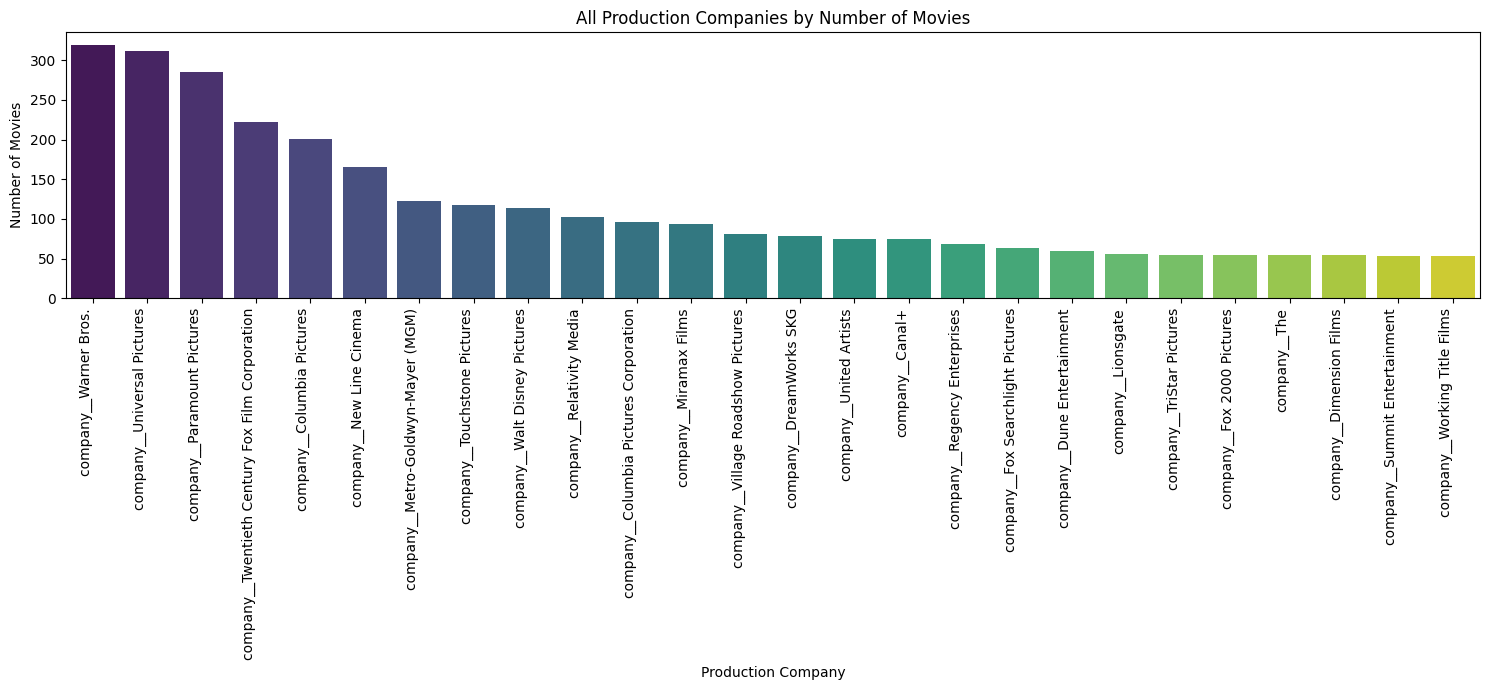

In [446]:
company_columns = [col for col in df.columns if col.startswith('company_')]

company_columns = [col for col in company_columns if col != 'company__']

if not company_columns:
    print("No columns starting with 'company_' found.")
else:
    company_counts = df[company_columns].sum().sort_values(ascending=False)

    all_companies = company_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_companies.index, y=all_companies.values, palette='viridis')
    plt.title('All Production Companies by Number of Movies')
    plt.xlabel('Production Company')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Production Country**

In [447]:
unique_count = df['production_countries'].str.split(', ').explode().nunique()
print("Number of unique countries:", unique_count)

Number of unique countries: 89


In [448]:
unique_values = df['production_countries'].str.split(', ').explode().unique()
print(unique_values)

['United States of America' 'United Kingdom' 'Jamaica' 'Bahamas'
 'Dominica' 'Czech Republic' 'Poland' 'Slovenia' 'New Zealand' 'Germany'
 'China' 'Canada' 'Italy' 'Japan' 'Malta' 'Australia' 'France' 'Belgium'
 'India' 'Netherlands' 'Spain' 'United Arab Emirates' 'Hong Kong' 'Taiwan'
 'Ireland' 'Morocco' '' 'Hungary' 'Singapore' 'Norway' 'Sweden'
 'South Africa' 'Russia' 'Romania' 'Mexico' 'Monaco' 'Switzerland'
 'Pakistan' 'Malaysia' 'Finland' 'Iceland' 'Denmark' 'Tunisia'
 'Philippines' 'Bulgaria' 'South Korea' 'Brazil' 'Peru' 'Luxembourg'
 'Bosnia and Herzegovina' 'Kazakhstan' 'Portugal' 'Aruba'
 'Libyan Arab Jamahiriya' 'Serbia' 'Ukraine' 'Chile' 'Argentina' 'Panama'
 'Austria' 'Greece' 'Lithuania' 'Cambodia' 'Thailand' 'Slovakia' 'Israel'
 'Fiji' 'Serbia and Montenegro' 'Turkey' 'Nigeria' 'Cyprus' 'Jordan'
 'Bolivia' 'Ecuador' 'Colombia' 'Egypt' 'Bhutan' 'Lebanon'
 'Kyrgyz Republic' 'Algeria' 'Indonesia' 'Guyana' 'Iran' 'Guadaloupe'
 'Afghanistan' 'Angola' 'Dominican Republic' 'C

In [449]:
value_counts = df['production_countries'].str.split(', ').explode().value_counts()
print(value_counts)

production_countries
United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
                            ... 
Afghanistan                    1
Angola                         1
Dominican Republic             1
Cameroon                       1
Kenya                          1
Name: count, Length: 89, dtype: int64


In [450]:
company_counts = df['production_countries'].str.split(', ').explode().value_counts()

low_count_countries = company_counts[company_counts < 100].index.tolist()

df['production_countries'] = df['production_countries'].apply(
    lambda x: ', '.join([company for company in x.split(', ') if company not in low_count_countries])
    if isinstance(x, str) else ''
)

print(f"Production countries with counts less than 100 removed from 'production_countries' column: {low_count_countries}")

Production countries with counts less than 100 removed from 'production_countries' column: ['Italy', 'Spain', 'China', 'Japan', 'India', 'Hong Kong', 'Ireland', 'Mexico', 'New Zealand', 'Belgium', 'Czech Republic', 'South Africa', 'Denmark', 'Switzerland', 'Russia', 'Sweden', 'South Korea', 'Netherlands', 'Norway', 'United Arab Emirates', 'Hungary', 'Brazil', 'Romania', 'Luxembourg', 'Argentina', 'Poland', 'Israel', 'Thailand', 'Austria', 'Iceland', 'Finland', 'Taiwan', 'Bahamas', 'Malta', 'Bulgaria', 'Morocco', 'Iran', 'Greece', 'Pakistan', 'Slovakia', 'Jamaica', 'Slovenia', 'Chile', 'Colombia', 'Singapore', 'Malaysia', 'Kazakhstan', 'Peru', 'Dominica', 'Monaco', 'Ukraine', 'Serbia', 'Libyan Arab Jamahiriya', 'Aruba', 'Bosnia and Herzegovina', 'Portugal', 'Philippines', 'Tunisia', 'Lithuania', 'Fiji', 'Serbia and Montenegro', 'Turkey', 'Nigeria', 'Cyprus', 'Cambodia', 'Panama', 'Bolivia', 'Jordan', 'Egypt', 'Ecuador', 'Lebanon', 'Kyrgyz Republic', 'Algeria', 'Bhutan', 'Indonesia', 'Gu

In [451]:
df['production_countries'] = df['production_countries'].apply(lambda x: [country.strip() for country in x.split(', ')] if isinstance(x, str) else [])

df = df.join(
    pd.get_dummies(df['production_countries']
    .explode(), prefix='country_')
    .groupby(level=0)
    .max()
    .astype(int)
)

df = df.drop(columns=['production_countries'])

In [452]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,cast,director,...,company__Walt Disney Pictures,company__Warner Bros.,company__Working Title Films,country__,country__Australia,country__Canada,country__France,country__Germany,country__United Kingdom,country__United States of America
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],...,0,0,0,0,0,0,0,0,1,1
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],...,1,0,0,0,0,0,0,0,0,1
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,"[Daniel Craig, Christoph Waltz, L\u00e9a Seydo...",[Sam Mendes],...,0,0,0,0,0,0,0,0,1,1
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],...,0,1,0,0,0,0,0,0,0,1
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],...,1,0,0,0,0,0,0,0,0,1


/tmp/ipython-input-2035575603.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_countries.index, y=all_countries.values, palette='viridis')


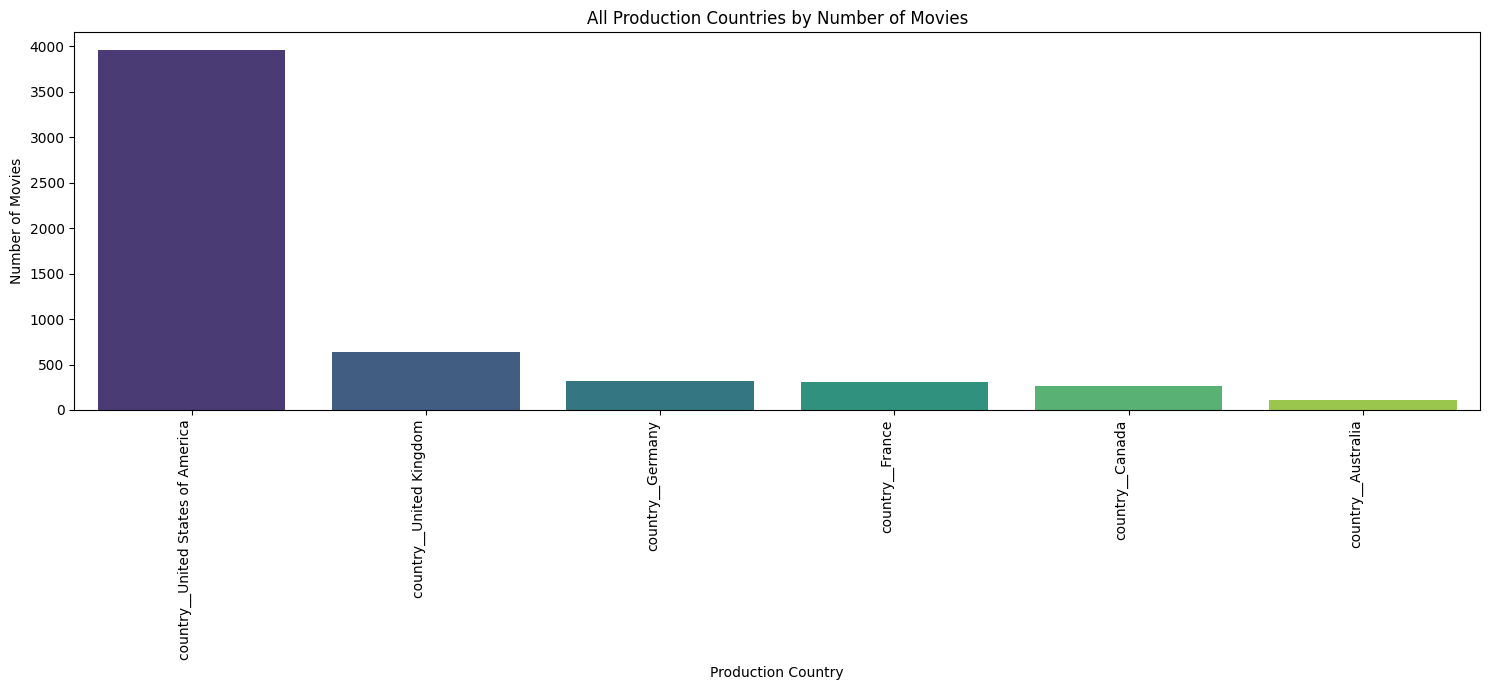

In [453]:
country_columns = [col for col in df.columns if col.startswith('country_')]

# Filter out the empty country column if it exists
country_columns = [col for col in country_columns if col != 'country__']

if not country_columns:
    print("No columns starting with 'country_' found.")
else:
    country_counts = df[country_columns].sum().sort_values(ascending=False)

    all_countries = country_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_countries.index, y=all_countries.values, palette='viridis')
    plt.title('All Production Countries by Number of Movies')
    plt.xlabel('Production Country')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Cast**

In [454]:
unique_count = df['cast'].explode().nunique()
print("Number of unique cast:", unique_count)

Number of unique cast: 12221


In [455]:
unique_cast = df['cast'].explode().unique()
print(unique_cast)

['Sam Worthington' 'Zoe Saldana' 'Sigourney Weaver' ... 'Alan Ruck'
 'Zhu Shimao' 'Brian Herzlinger']


In [456]:
cast_counts = df['cast'].explode().value_counts()
print(cast_counts)

cast
Robert De             51
Samuel L.             41
Bruce Willis          38
Matt Damon            35
Morgan Freeman        34
                      ..
Mendes                 1
Duncan Eva             1
Barry Newman           1
Emmanuelle Vaugier     1
D'Arcy                 1
Name: count, Length: 12221, dtype: int64


In [457]:
low_count_cast = cast_counts[cast_counts < 10].index.tolist()

df['cast'] = df['cast'].apply(
    lambda x: [cast for cast in x if cast not in low_count_cast] if isinstance(x, list) else []
)

print(f"cast with counts less than 10 removed from 'cast' column: {low_count_cast}")

cast with counts less than 10 removed from 'cast' column: ['Andy Serkis', 'Jones', 'Javier Bardem', 'Rachael Leigh', 'Mark Strong', 'Michael Angarano', 'Michael Madsen', 'Jonathan Rhys', 'Wesley Snipes', 'David Cross', 'Paula Patton', 'J.K. Simmons', 'Aidan Quinn', 'Megan Fox', 'Parker Posey', 'Dominic West', 'Jason Sudeikis', 'Claire Danes', 'Meagan Good', 'Miles Teller', 'Eric Roberts', 'Cedric the', 'Johnny Knoxville', 'Randy Quaid', 'Cillian Murphy', 'Daniel Day-Lewis', 'Sarah Michelle', 'Emma Thompson', 'Chlo\\u00eb Sevigny', 'Michelle Rodriguez', 'Vincent Cassel', 'Ian McShane', 'Bruce Dern', 'Rosamund Pike', 'Heather Graham', 'Chiwetel Ejiofor', 'Robin Wright', 'Oscar Isaac', 'Piper Perabo', 'Vanessa Hudgens', 'Cliff Curtis', 'Robert Englund', 'Hope Davis', 'Stephen Dorff', 'Kenneth Branagh', 'Ryan Phillippe', 'Ellen Burstyn', 'Wes Bentley', 'John Krasinski', 'Williams', 'Sharon Stone', 'Maggie Smith', 'Brittany Murphy', 'Dakota Fanning', 'Idris Elba', 'David Arquette', 'Richard

In [458]:
df['cast'] = df['cast'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

cast_dummies = pd.get_dummies(df['cast'].explode(), prefix='cast').groupby(level=0).max().astype(int)

df = df.join(cast_dummies)

df = df.drop(columns=['cast'])

In [459]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,director,genres_Action,...,cast_William H.,cast_William Hurt,cast_William Shatner,cast_Winona Ryder,cast_Woody Allen,cast_Woody Harrelson,cast_Zac Efron,cast_Zach Galifianakis,cast_Zoe Saldana,cast_Zooey Deschanel
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,[James Cameron],1,...,0,0,0,0,0,0,0,0,1,0
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,[Gore Verbinski],1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,[Sam Mendes],1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,[Christopher Nolan],1,...,0,0,0,0,0,0,0,0,0,0
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,[Andrew Stanton],1,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipython-input-201635875.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_cast.index, y=all_cast.values, palette='viridis')


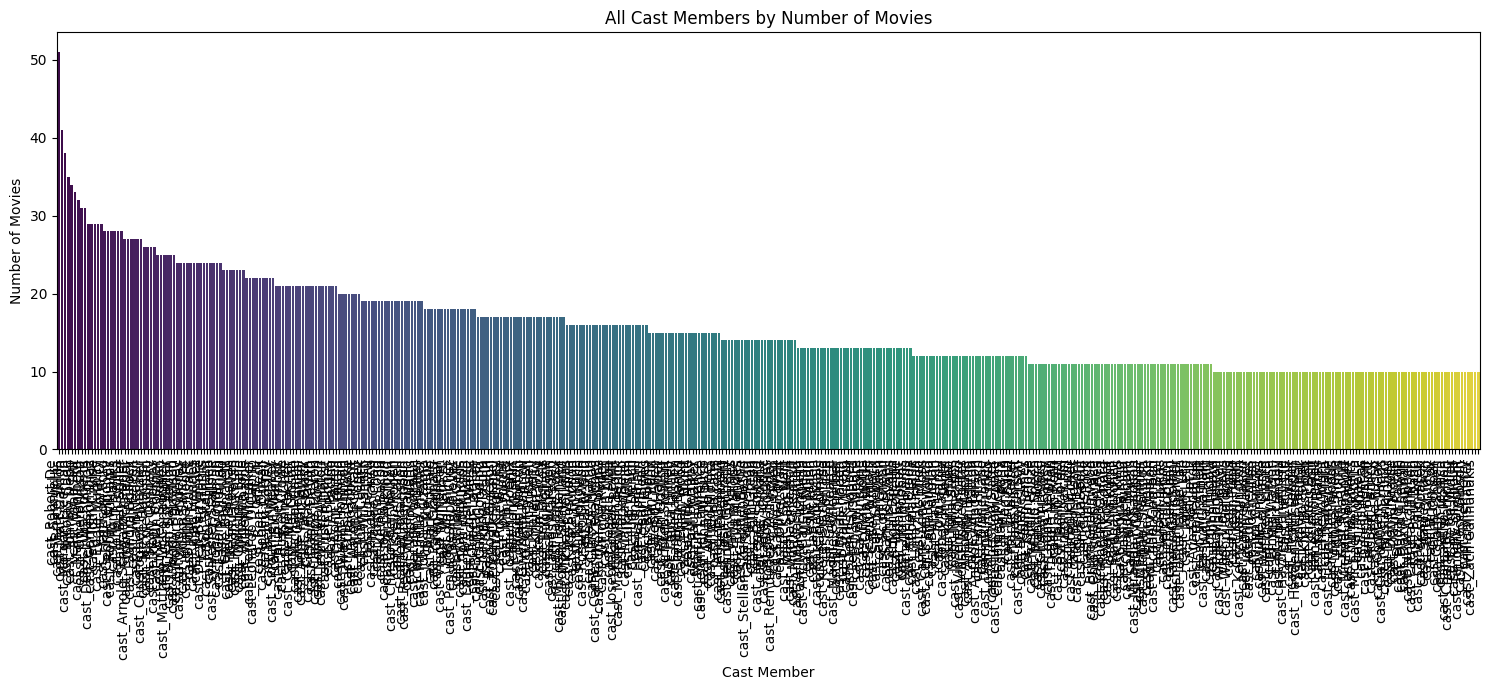

In [460]:
cast_columns = [col for col in df.columns if col.startswith('cast_')]

# Filter out any empty cast column if it exists (though less likely for cast)
cast_columns = [col for col in cast_columns if col != 'cast__']

if not cast_columns:
    print("No columns starting with 'cast_' found.")
else:
    cast_counts = df[cast_columns].sum().sort_values(ascending=False)

    all_cast = cast_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_cast.index, y=all_cast.values, palette='viridis')
    plt.title('All Cast Members by Number of Movies')
    plt.xlabel('Cast Member')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Number of Director**

In [461]:
unique_count = df['director'].explode().nunique()
print("Number of unique director:", unique_count)

Number of unique director: 2523


In [462]:
unique_director = df['director'].explode().unique()
print(unique_director)

['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Scott Smith'
 'Daniel Hsia' 'Brian Herzlinger']


In [463]:
director_counts = df['director'].explode().value_counts()
print(director_counts)

director
Steven Spielberg    27
Woody Allen         21
Martin Scorsese     20
Clint Eastwood      20
Anderson            18
                    ..
Jim Chuchu           1
Marcus Nispel        1
Joseph Mazzella      1
Eric Eason           1
James Bidgood        1
Name: count, Length: 2523, dtype: int64


In [464]:
low_count_director = director_counts[director_counts < 5].index.tolist()

df['director'] = df['director'].apply(
    lambda x: [director for director in x if director not in low_count_director] if isinstance(x, list) else []
)

print(f"director with counts less than 5 removed from 'director' column: {low_count_director}")

director with counts less than 5 removed from 'director' column: ['Brad Bird', 'Keenen Ivory', 'Anthony Russo', 'John Dahl', 'Sean Anders', 'Rob Bowman', 'Stephen Sommers', 'Roger Spottiswoode', 'Michel Gondry', 'Bille Woodruff', 'Richard Fleischer', 'Michael Hoffman', 'Richard Attenborough', 'James Gray', 'David Lean', 'Mark L.', 'Lester', 'Refn', 'Peter Cattaneo', 'Phil Lord', 'Jonathan Lynn', 'Timur Bekmambetov', 'Walt Becker', 'John Erick', 'Dowdle', 'Mike Judge', 'Christopher Guest', 'Dennie Gordon', 'Jonathan Mostow', 'Irwin Winkler', 'Sofia Coppola', 'David Wain', 'George Tillman,', 'Hayao Miyazaki', 'Ronny Yu', 'Alexandre Aja', 'Spike Jonze', 'Joe Johnston', 'Rick Famuyiwa', 'Vincenzo Natali', 'Hugh Wilson', 'Brad Silberling', 'Jonathan Levine', 'Sergio Leone', 'John Moore', 'John Lee', 'Robert Wise', 'Luke Greenfield', 'Walter Hill', 'Iain Softley', 'Mitchell', 'Mike Mitchell', 'Matt Reeves', 'Andrew Davis', 'Jean-Jacques Annaud', 'Nicolas Winding', 'Rob Zombie', 'Carlos Salda

In [465]:
df['director'] = df['director'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

director_dummies = pd.get_dummies(df['director'].explode(), prefix='director').groupby(level=0).max().astype(int)

df = df.join(director_dummies)

df = df.drop(columns=['director'])

In [466]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,director_Uwe Boll,director_Wayans,director_Wayne Wang,director_Wes Anderson,director_Wes Craven,director_William Friedkin,director_Wolfgang Petersen,director_Woody Allen,director_Zack Snyder,director_Zhang Yimou
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,1,1,...,0,0,0,0,0,0,0,0,0,0
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,1,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,1,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,1,0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,1,1,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipython-input-3798875510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_directors.index, y=all_directors.values, palette='viridis')


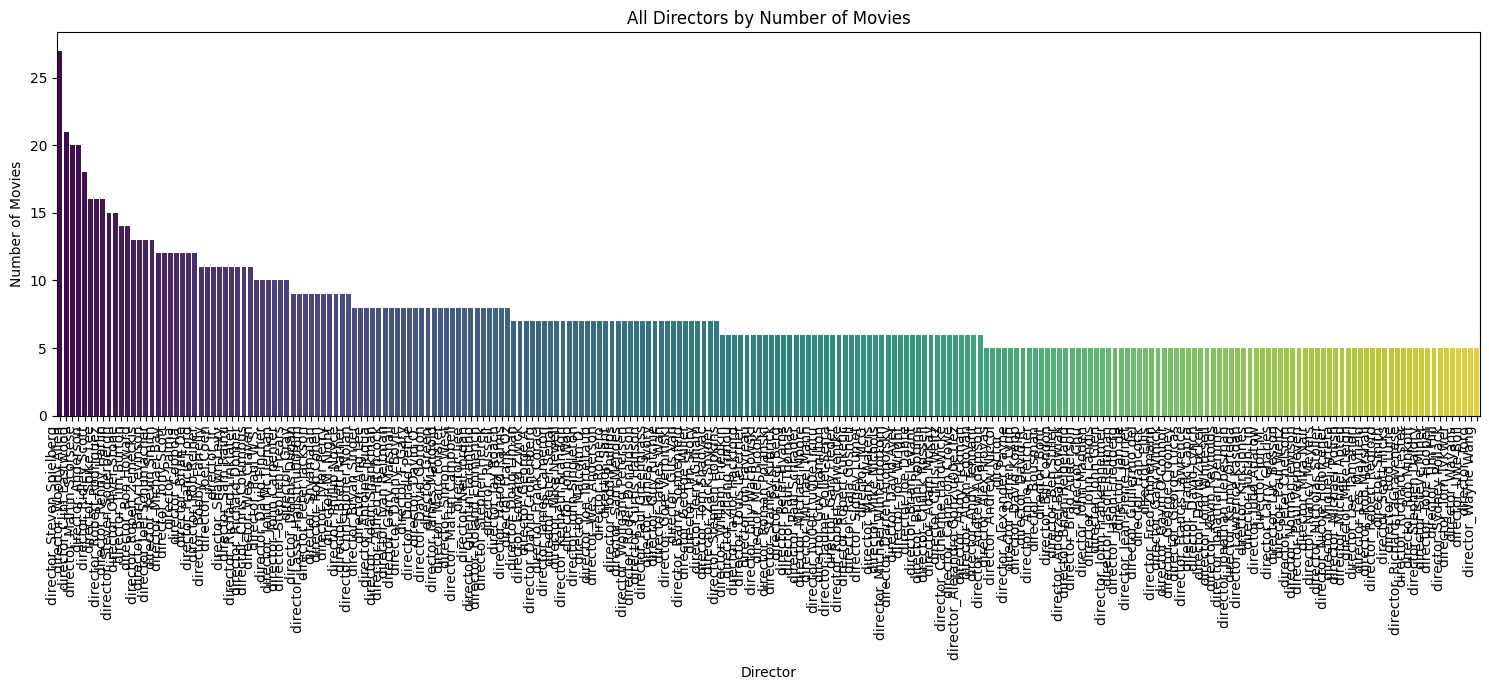

In [467]:
director_columns = [col for col in df.columns if col.startswith('director_')]

# Filter out any empty director column if it exists
director_columns = [col for col in director_columns if col != 'director__']

if not director_columns:
    print("No columns starting with 'director_' found.")
else:
    director_counts = df[director_columns].sum().sort_values(ascending=False)

    all_directors = director_counts

    plt.figure(figsize=(15, 7))
    sns.barplot(x=all_directors.index, y=all_directors.values, palette='viridis')
    plt.title('All Directors by Number of Movies')
    plt.xlabel('Director')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### **Dropping the features with inbalance data and many columns after one-hot encoding**

In [468]:
# Identify columns to drop based on prefixes
prefix_columns_to_drop = []
for prefix in ['lang_', 'country_', 'cast_', 'director_']:
    prefix_columns_to_drop.extend([col for col in df.columns if col.startswith(prefix)])

# Combine with previously identified columns to drop
all_columns_to_drop = list(set(columns_to_drop + prefix_columns_to_drop))

df.drop(columns=all_columns_to_drop, inplace=True, errors='ignore')

### **Checking of null and duplicated values**

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   budget                                           4803 non-null   int64  
 1   homepage                                         4803 non-null   int64  
 2   popularity                                       4803 non-null   float64
 3   release_date                                     4802 non-null   float64
 4   revenue                                          4803 non-null   int64  
 5   runtime                                          4801 non-null   float64
 6   vote_average                                     4803 non-null   float64
 7   vote_count                                       4803 non-null   int64  
 8   genres_Action                                    4803 non-null   int64  
 9   genres_Adventure              

In [470]:
df.isnull().sum()

,0
budget,0
homepage,0
popularity,0
release_date,1
revenue,0
runtime,2
vote_average,0
vote_count,0
genres_Action,0
genres_Adventure,0


In [471]:
df.dropna(inplace=True)

In [472]:
df.duplicated().sum()

np.int64(0)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   budget                                           4800 non-null   int64  
 1   homepage                                         4800 non-null   int64  
 2   popularity                                       4800 non-null   float64
 3   release_date                                     4800 non-null   float64
 4   revenue                                          4800 non-null   int64  
 5   runtime                                          4800 non-null   float64
 6   vote_average                                     4800 non-null   float64
 7   vote_count                                       4800 non-null   int64  
 8   genres_Action                                    4800 non-null   int64  
 9   genres_Adventure                   

## **Standardizing the Data**

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   budget                                           4800 non-null   int64  
 1   homepage                                         4800 non-null   int64  
 2   popularity                                       4800 non-null   float64
 3   release_date                                     4800 non-null   float64
 4   revenue                                          4800 non-null   int64  
 5   runtime                                          4800 non-null   float64
 6   vote_average                                     4800 non-null   float64
 7   vote_count                                       4800 non-null   int64  
 8   genres_Action                                    4800 non-null   int64  
 9   genres_Adventure                   

In [475]:
df.head(10)

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,company__The,company__Touchstone Pictures,company__TriStar Pictures,company__Twentieth Century Fox Film Corporation,company__United Artists,company__Universal Pictures,company__Village Roadshow Pictures,company__Walt Disney Pictures,company__Warner Bros.,company__Working Title Films
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,1,1,...,0,0,0,1,0,0,0,0,0,0
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,1,1,...,0,0,0,0,0,0,0,1,0,0
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,1,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,1,0,...,0,0,0,0,0,0,0,0,1,0
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,1,1,...,0,0,0,0,0,0,0,1,0,0
5,258000000,1,115.699814,2007.0,890871626,139.0,5.9,3576,1,1,...,0,0,0,0,0,0,0,0,0,0
6,260000000,1,48.681969,2010.0,591794936,100.0,7.4,3330,0,0,...,0,0,0,0,0,0,0,1,0,0
7,280000000,1,134.279229,2015.0,1405403694,141.0,7.3,6767,1,1,...,0,0,0,0,0,0,0,0,0,0
8,250000000,1,98.885637,2009.0,933959197,153.0,7.4,5293,0,1,...,0,0,0,0,0,0,0,0,1,0
9,250000000,1,155.790452,2016.0,873260194,151.0,5.7,7004,1,1,...,0,0,0,0,0,0,0,0,1,0


In [476]:
columns_to_standardize = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [477]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,company__The,company__Touchstone Pictures,company__TriStar Pictures,company__Twentieth Century Fox Film Corporation,company__United Artists,company__Universal Pictures,company__Village Roadshow Pictures,company__Walt Disney Pictures,company__Warner Bros.,company__Working Title Films
0,5.105821,1,4.052064,2009.0,16.611528,2.442541,0.930401,8.997440,1,1,...,0,0,0,1,0,0,0,0,0,0
1,6.652742,1,3.695201,2007.0,5.394760,2.752835,0.677927,3.085186,1,1,...,0,0,0,0,0,0,0,1,0,0
2,5.302256,1,2.698753,2015.0,4.901597,1.821953,0.172980,3.057650,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5.425027,1,2.853887,2012.0,6.155692,2.575524,1.267033,6.815575,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5.670570,1,0.704659,2012.0,1.239130,1.112709,0.004664,1.160869,1,1,...,0,0,0,0,0,0,0,1,0,0


## **Import the new Dataset**

In [478]:
df.to_csv('cleaned_data.csv', index=False)